In [1]:
import numpy as np
import math
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
# Get floating-point information for default float data type
float_info = np.finfo(float)
# Machine epsilon
print(float_info.eps)

2.220446049250313e-16


## Lab Book 01

In [3]:
# a)
print("the largest positive finite machine number is", float_info.max)
# b)
print("the largest absolute value of negative finite machine number is", abs(float_info.min))
# c)
print("smallest positive machine number is", float_info.tiny)

the largest positive finite machine number is 1.7976931348623157e+308
the largest absolute value of negative finite machine number is 1.7976931348623157e+308
smallest positive machine number is 2.2250738585072014e-308


In [4]:
# Generate np.nan
x = np.arange(5)
print(x / x)
# Generate np.inf
y = np.ones((5,))
print(y / x)
# Is infinity equal to itself?
print(np.inf == np.inf)
# Is nan equal to itself?
print(np.nan == np.nan)
# Compare nan to other values
print(np.nan < 0, np.nan == 0, np.nan > 0)


[nan  1.  1.  1.  1.]
[       inf 1.         0.5        0.33333333 0.25      ]
True
False
False False False


/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [5]:
print(1+2==3)
print(0.1+0.2==0.3)
print(0.1+0.2+0.7==1)

True
False
True


## Lab Book 02

In [6]:
print("sin(pi) = ",math.sin(math.pi))
print("cos(pi/2) = ",math.cos(0.5*math.pi))
print("sin(pi/2) = ",math.sin(0.5*math.pi))
print("cos(0) = ",math.cos(0))
print("cos(pi) = ",math.cos(math.pi))

sin(pi) =  1.2246467991473532e-16
cos(pi/2) =  6.123233995736766e-17
sin(pi/2) =  1.0
cos(0) =  1.0
cos(pi) =  -1.0


When the value of sin or cos should be 0, python can't return the exact value but can only return extremely small number. When the value should be +-1, python can give the exactly right answer.

## Lab Book 03

In [7]:
def f(x):
    return (np.cos(2*x)-1) / pow(x,2)
def taylorF(x):
    return 2 * pow(x,2)/3 - 2
def alterF(x):
    return -2 * pow(np.sin(x),2) / pow(x,2)

In [8]:
x=np.array([1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10])
for item in x:
    print("x = ", item)
    print("f(x) = ", f(item))
    print("result of Talor series = ", taylorF(item), ", the error is ", abs(f(item)-taylorF(item)))
    print("improved result = ", alterF(item), "the difference with Taylor series is ", abs(taylorF(item)-alterF(item)))

x =  0.01
f(x) =  -1.9999333342224368
result of Talor series =  -1.9999333333333333 , the error is  8.891034575242429e-10
improved result =  -1.9999333342222159 the difference with Taylor series is  8.888825231423425e-10
x =  0.001
f(x) =  -1.999999333368585
result of Talor series =  -1.9999993333333332 , the error is  3.525180147789797e-11
improved result =  -1.9999993333334223 the difference with Taylor series is  8.903988657493755e-14
x =  0.0001
f(x) =  -1.999999987845058
result of Talor series =  -1.9999999933333332 , the error is  5.488275167664369e-09
improved result =  -1.9999999933333334 the difference with Taylor series is  2.220446049250313e-16
x =  1e-05
f(x) =  -2.0000001654807416
result of Talor series =  -1.9999999999333333 , the error is  1.6554740822627423e-07
improved result =  -1.999999999933333 the difference with Taylor series is  2.220446049250313e-16
x =  1e-06
f(x) =  -1.999955756559757
result of Talor series =  -1.9999999999993334 , the error is  4.424343957643

Python has an bigger error when x is smaller when calculating f(x) because of the subtraction in numerator will lead to catastrophic cancellation when two values are close to 0 and therefore leads to big error.

## Lab Book 04

In [9]:
def expTaylor(x):
    term = 1.0
    result = 0.0
    n = 1
    while term + result != result:
        term = pow(x,n) / math.factorial(n)
        result += term
        n += 1
    return result + 1
for item in x:
    print("x = ", item)
    print("exp(x) = ",math.exp(item)-1)
    print("expm1(x) = ",math.expm1(item))
    print("Taylor series = ",expTaylor(item)-1)

x =  0.01
exp(x) =  0.010050167084167949
expm1(x) =  0.010050167084168058
Taylor series =  0.010050167084167949
x =  0.001
exp(x) =  0.0010005001667083846
expm1(x) =  0.0010005001667083417
Taylor series =  0.0010005001667083846
x =  0.0001
exp(x) =  0.0001000050001667141
expm1(x) =  0.00010000500016667084
Taylor series =  0.0001000050001667141
x =  1e-05
exp(x) =  1.0000050000069649e-05
expm1(x) =  1.0000050000166668e-05
Taylor series =  1.0000050000069649e-05
x =  1e-06
exp(x) =  1.0000004999621837e-06
expm1(x) =  1.0000005000001665e-06
Taylor series =  1.0000004999621837e-06
x =  1e-07
exp(x) =  1.0000000494336803e-07
expm1(x) =  1.0000000500000016e-07
Taylor series =  1.0000000494336803e-07
x =  1e-08
exp(x) =  9.99999993922529e-09
expm1(x) =  1.0000000050000001e-08
Taylor series =  9.99999993922529e-09
x =  1e-09
exp(x) =  1.000000082740371e-09
expm1(x) =  1.0000000005000001e-09
Taylor series =  1.000000082740371e-09
x =  1e-10
exp(x) =  1.000000082740371e-10
expm1(x) =  1.00000000

Since e^x is quite close to 1 when x is close to 0, therefore the digits after 1 can not be stored properly and when calculating e^x -1, the catastrophic cancellation will occur and lead to inaccurate results compared to expm1(x). Similar error occurs when using Taylor series expansion due to the same result.

## Lab Book 05

In [10]:
def f(x):
    return math.exp(x) - math.cos(x)
def df(x):
    return math.exp(x) + math.sin(x)

<function matplotlib.pyplot.show(*args, **kw)>

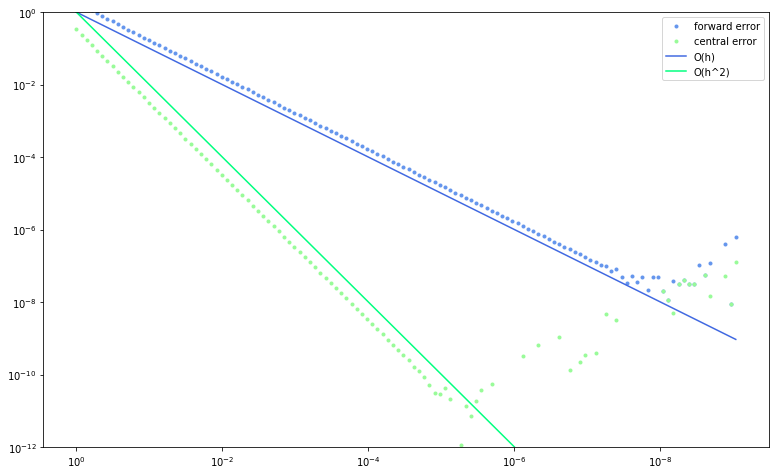

In [11]:
# Decreasing sequence of h values
hs = 2**(-np.linspace(0,30,128))
# Make an empty vector of errors
forward_error = np.zeros((len(hs),))
central_error = np.zeros((len(hs),))
for i in range(len(hs)):
    h = hs[i]  # current value of h
    forward_error[i] = (f(1+h) - f(1)) / h - df(1)
    central_error[i] = (f(1+h) - f(1-h)) / (2*h) - df(1)
# The below vectors show the error decrease for particular orders of convergence
first_order_rate = hs      # plot hs vs first_order_rate to see O(h) convergence
second_order_rate = hs**2  # plot hs vs second_order_rate to see O(h^2) convergence rate

# Plot hs vs forward_error and central_error (on a log-log plot)
plt.figure(figsize = (13,8))
plt.clf()
plt.loglog(hs, forward_error,'.', label = "forward error", color='cornflowerblue')
plt.loglog(hs, central_error,'.', label = "central error", color = 'palegreen')
plt.loglog(hs, first_order_rate, label = "O(h)", color = 'royalblue')
plt.loglog(hs, second_order_rate, label = "O(h^2)", color='springgreen')
plt.legend(loc = 'best')
ax = plt.gca()
ax.invert_xaxis()
plt.ylim(1e-12,1)
plt.show

As h approaches 0, the forward error is almost the same as O(h)'s convergence rate before reaching the machine epsilon, which suggests it's order of convergence is 1. Similarly, the central error is almost the same as O(h^2) before reaching the machine epsilon, therefore it has an order of convergence of 2.

## Lab Book 06

<function matplotlib.pyplot.show(*args, **kw)>

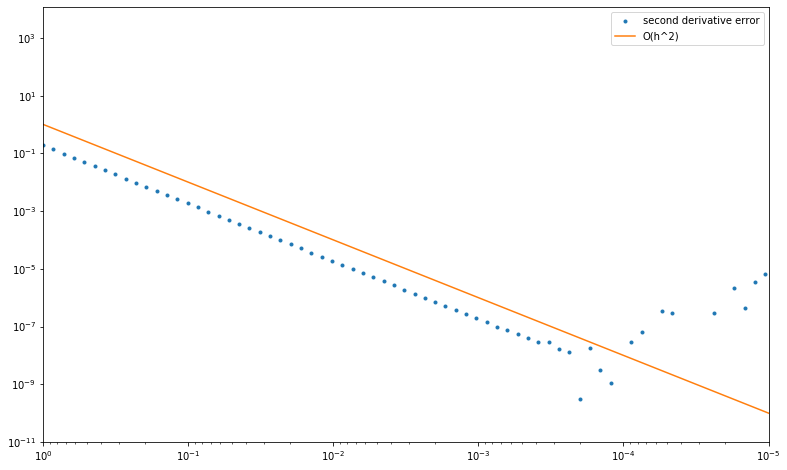

In [12]:
def d2f(x):
    return math.exp(x) + math.cos(x)
second_error = np.zeros((len(hs),))
for i in range(len(hs)):
    h = hs[i]
    second_error[i] = (f(1+h) - 2*f(1) + f(1-h)) / pow(h,2) - d2f(1)

plt.figure(figsize = (13,8))
plt.clf()
plt.loglog(hs, second_error,'.', label = "second derivative error",)
plt.loglog(hs, second_order_rate, label = "O(h^2)")
plt.legend(loc = 'best')
plt.xlim(1e-5,1)
plt.ylim(1e-11,)
ax = plt.gca()
ax.invert_xaxis()
plt.show

As h approaches to 0, the error of second order derivative's approximation is almost the same as O(h^2)'s convergence rate before reaching the machine epsilon, this suggests that it's order of convergence is 2.

## Lab Book 07

In [13]:
def left_riemann_sum(xs, ys):
    n = len(xs)
    if len(xs) != len(ys):
        return np.NaN
    integrals = np.zeros(n)
    x0s = xs[:n-1]
    x1s = xs[1:]
    integrals = (x1s-x0s) * ys[:n-1]
    return sum(integrals)
def f(x):
    return math.exp(-x)

In [14]:
a = -1
b = 1
n = 100
xs = np.linspace(a, b, n)  # equally spaced points xi
ys = np.zeros(n)
for i in range(n-1):
    ys[i] = f(xs[i])
print("Left Riemann sum =", left_riemann_sum(xs, ys))
print("True value is around 2.350402387287603")

Left Riemann sum = 2.374223762501847
True value is around 2.350402387287603


The left Reimann Sum can roughly approximate the integral and has 2 acutare digits. The accuracy can also be improved by adding more points and make each points closer but in a raletively low convergence rate.

## Lab Book 08

In [15]:
def trapezoidal_rule(xs, ys):
    n = len(xs)
    if len(xs) != len(ys):
        return np.NaN
    integrals = np.zeros(n)
    x0s = xs[:n-1]
    x1s = xs[1:]
    y0s =  ys[:n-1]
    y1s =ys[1:]
    integrals = (x1s-x0s) * (y0s+y1s) / 2
    return sum(integrals)

In [16]:
print("Trapezoidal Rule =", trapezoidal_rule(xs, ys))
print("Left Riemann sum =", left_riemann_sum(xs, ys))
print("True value is around 2.350402387287603")

Trapezoidal Rule = 2.346766370295189
Left Riemann sum = 2.374223762501847
True value is around 2.350402387287603


The Trapezoidal Rule clearly has a much more accuracy with same number of points although it also can only give two accurate digits. When incresing the number of points, the Trapezoidal Rule has a faster convergence rate than left Riemann Sum.

## Lab Book 09

In [17]:
def runges(x):
    return 1 / (1 + 25*pow(x,2))

In [18]:
n = 20
xs = np.linspace(a, b, n)  # equally spaced points xi
ys = runges(xs)
print("Simpson's Rule = ", scipy.integrate.simps(ys, xs))
print("Gaussian Quadrature = ", scipy.integrate.fixed_quad(runges, a, b, n = n)[0])
print("True value is around 0.549360307")

Simpson's Rule =  0.5493758748195977
Gaussian Quadrature =  0.548997098104952
True value is around 0.549360307


Both ways gives three acurate digits compared to the ture value. The Simpson's Rule in python is more accurate than Gaussian Quadrature and have errors at 10^5 and 10^-3 respectively.

## Lab Book 10

In [19]:
print("The approximation is ", scipy.integrate.quad(runges, a, b)[0], ", the error is ", scipy.integrate.quad(runges, a, b)[1])

The approximation is  0.5493603067780066 , the error is  2.8668279350011863e-09


The output is quite accurate compared to the true value and the error is at 10^-9, which is a very small error compared to the above two methods.